In [5]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 240us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 210us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030


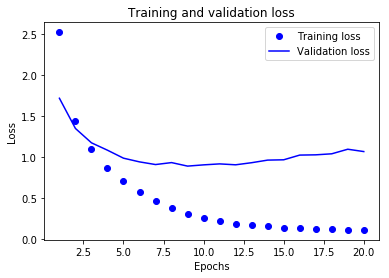

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

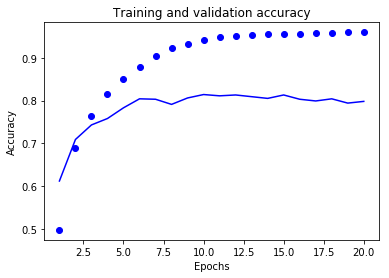

In [15]:
#plt.clf() #清空图像

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc , 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 263us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 226us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 222us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 244us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 257us/step - loss: 0.6392 - acc: 0.8626 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 241us/step - loss: 0.5120 - acc: 0.8923 - val_loss: 0.9103 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.4119 - acc: 0.9146 - val_loss: 0.8911 - val_acc: 0.8210
Epoch 8

In [19]:
results


[1.0240364497194094, 0.77515583264434962]

In [22]:
import copy
test_labels_copy = copy.copy(test_labels)


In [26]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [24]:
np.random.shuffle(test_labels_copy)

In [25]:
test_labels_copy

array([ 3, 31,  4, ..., 16, 33,  3], dtype=int64)

In [27]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array

array([ True, False, False, ..., False, False, False], dtype=bool)

In [28]:
float(np.sum(hits_array)) / len(test_labels)

0.19857524487978628

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape[0]

46

In [31]:
np.sum(predictions[0])

0.99999964

In [32]:
np.argmax(predictions[0])

3